# Solutions

What I have Answered In this NoteBook:
1. Topic Clustering 
2. Topic labeling
3. Topic Identification
4. Sentiment Analysis
5. Finding Insights from Sentiment analysis

Sorry I can't write a whole paragraph for each of the set's I have mostly redirected some of the task to my old works as i am in hospital

# topic clustering

process: text processing : which follows lowering, removing most frequent and rear words ,removing emoji,emojicon etc and finally doing lemmenization upon them so we will get only tokens of words ;
remember i have shown here tweets related to english only use appropiate lemme function to deal with as many as languages. then run a k mean clustering on the tokens to identify appropiate topics use t-sne for visualization and elbow curve for number of tokens.
your clustering done .

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-support-on-twitter/sample.csv
/kaggle/input/customer-support-on-twitter/twcs/twcs.csv


In [2]:
tweet =pd.read_csv("../input/customer-support-on-twitter/twcs/twcs.csv")
tweet_text = tweet[["text"]]
tweet_text["text"] = tweet_text["text"].astype(str)
tweet.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [3]:
tweet_text.head()

,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.


In [4]:
tweet.shape

(2811774, 7)

In [5]:
tweet.isna().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [8]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [9]:
tweet_text["text_lower"]=tweet_text["text"].str.lower()
tweet_text

,text,text_lower
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...
4,@sprintcare I did.,@sprintcare i did.
...,...,...
2811769,"@823869 Hey, we'd be happy to look into this f...","@823869 hey, we'd be happy to look into this f..."
2811770,@115714 wtf!? I’ve been having really shitty s...,@115714 wtf!? i’ve been having really shitty s...
2811771,@143549 @sprintcare You have to go to https://...,@143549 @sprintcare you have to go to https://...
2811772,"@823870 Sounds delicious, Sarah! 😋 https://t.c...","@823870 sounds delicious, sarah! 😋 https://t.c..."


In [10]:
#df.drop(["text_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

tweet_text["text_wo_punct"] = tweet_text["text_lower"].apply(lambda text: remove_punctuation(text))
tweet_text.head()

,text,text_lower,text_wo_punct
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did


In [11]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [12]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweet_text["text_wo_stop"] = tweet_text["text_wo_punct"].apply(lambda text: remove_stopwords(text))
tweet_text.head()

,text,text_lower,text_wo_punct,text_wo_stop
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare


In [13]:
from collections import Counter
cnt = Counter()
for text in tweet_text["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('us', 451262),
 ('please', 402709),
 ('dm', 335374),
 ('help', 267633),
 ('hi', 224603),
 ('thanks', 206452),
 ('get', 200374),
 ('sorry', 192246),
 ('like', 146385),
 ('know', 145407)]

In [14]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(15)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

tweet_text["text_wo_stopfreq"] = tweet_text["text_wo_stop"].apply(lambda text: remove_freqwords(text))
tweet_text.head()

,text,text_lower,text_wo_punct,text_wo_stop,text_wo_stopfreq
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 private message assist click ‘message’ ...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare


In [ ]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

tweet_text["text_wo_stopfreqrare"] = tweet_text["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
tweet_text.head()

In [15]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
#tweet_text.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

tweet_text["text_stemmed"] = tweet_text["text_lower"].apply(lambda text: stem_words(text))
tweet_text.head()

,text,text_lower,text_wo_punct,text_wo_stop,text_wo_stopfreq,text_stemmed
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,@sprintcar and how do you propos we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,@sprintcar i have sent sever privat messag and...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 private message assist click ‘message’ ...,@115712 pleas send us a privat messag so that ...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,@sprintcar i did.


In [16]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
tweet_text["text_removalurl"] = tweet_text["text_wo_stopfreq"].apply(lambda text: remove_urls(text))
tweet_text.head()

,text,text_lower,text_wo_punct,text_wo_stop,text_wo_stopfreq,text_stemmed,text_removalurl
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,@115712 i understand. i would like to assist y...,115712 understand would assist would need priv...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,@sprintcar and how do you propos we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,@sprintcar i have sent sever privat messag and...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 private message assist click ‘message’ ...,@115712 pleas send us a privat messag so that ...,115712 private message assist click ‘message’ ...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,@sprintcar i did.,sprintcare


In [17]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [18]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)


print(chat_words_conversion("one minute BRB"))
tweet_text["text_chat_words_conversion"] = tweet_text["text_removalurl"].apply(lambda text: chat_words_conversion(text))
tweet_text.head()

one minute Be Right Back


,text,text_lower,text_wo_punct,text_wo_stop,text_wo_stopfreq,text_stemmed,text_removalurl,text_chat_words_conversion
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,@115712 i understand. i would like to assist y...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,@sprintcar and how do you propos we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,@sprintcar i have sent sever privat messag and...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 private message assist click ‘message’ ...,@115712 pleas send us a privat messag so that ...,115712 private message assist click ‘message’ ...,115712 private message assist click ‘message’ ...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,@sprintcar i did.,sprintcare,sprintcare


In [19]:
!pip install pyspellchecker

     |████████████████████████████████| 1.9 MB 5.0 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [20]:
!pip install spacy_cld

     |████████████████████████████████| 41.4 MB 131 kB/s eta 0:00:01
  Created wheel for spacy-cld: filename=spacy_cld-0.1.0-py3-none-any.whl size=4064 sha256=454d83fd99c748f83ab4156e41a9f3fe42af8eb88cff61cdfa204c85028fcec8
  Stored in directory: /root/.cache/pip/wheels/82/6b/8f/260626615a2629391aca1fce5d3c676dde154f8aabb18d25bf
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834351 sha256=a186314c5b890401d06536950cda06bec4df23d0e9c4c21472c401d218218339
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built spacy-cld pycld2
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [21]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

tweet_text["text_lemmatized"] = tweet_text["text_chat_words_conversion"].apply(lambda text: lemmatize_words(text))
tweet_text.head()

KeyboardInterrupt: 

In [ ]:
def convert(lst): 
    return (lst[0].split())
tweet_text["text_finilaized"] = tweet_text["text_lemmatized"].apply(lambda text: convert(text))
tweet_text.head()

In [ ]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics
  
# training data
""" 
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]
"""
sentences = tweet_text["text_lemmatized"]
  
 
model = Word2Vec(sentences, min_count=1)
 
  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
print (X)
 
 
  
 
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
print (model[model.wv.vocab])
 
 
  
 
print (model.similarity('post', 'book'))
print (model.most_similar(positive=['machine'], negative=[], topn=2))

NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
  
  
  
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))
 
     
     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
 
plt.show()

# topic labeling

once we have our labels we can train embedding to learn features in an embedding space for properly identify labels of our unseen data 
treat it as classification (multiclass problem ) i am linking the demo solution here.
https://github.com/MachineLearningWithHuman/python/blob/master/Advance_ML/NLP%20in%20tensorflow/embedding/bbc/BBC.ipynb


some of the code with this dataset for labeling you can see here

In [ ]:
#embedding(tokenization)
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
sentences=list(tweet_text["text"])
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))
#print(word_index)


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

# Sentiment Analysis

we can build a sentiment analysis with explicit label as well as implicit labels 
explicit model: we have to label the training data set use embedding and we can get good classifier i am linking imdb review work i had done here https://github.com/MachineLearningWithHuman/python/tree/master/Advance_ML/NLP%20in%20tensorflow/embedding/imdb
implicit model: we can get positive and negative label without explicit labelling from emoji's provided we have huge corpus of tweets of emoji's
once we find the sentiment we will get its topic from topic model 
Now to get the result of unhappyness let's say our topic model suggests a tweet is from amazoncare so we will subset all the tweet's based upon topics and we will run a topic clustering again to find the reasons or segregate graviances in different channel and run classifier again to find the reason.


In [29]:
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]

QnR = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

# Filter to only outbound replies (from companies)
QnR = QnR[QnR.inbound_y ^ True]
print(f'Data shape: {QnR.shape}')
QnR.head()

Data shape: (794299, 14)


,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


In [30]:
#making sure the dataframe contains only the needed columns
QnR = QnR[["author_id_x","created_at_x","text_x","author_id_y","created_at_y","text_y"]]
QnR.head(5)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...
1,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...
3,115713,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...


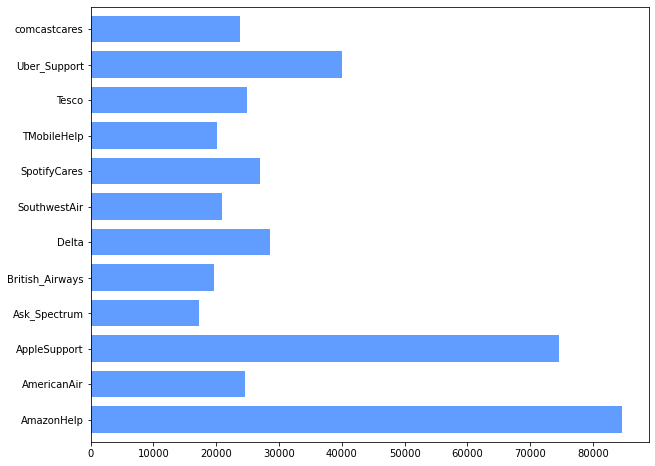

In [33]:
import matplotlib.pyplot as plt
width = 0.75
count = QnR.groupby("author_id_y")["text_x"].count()
c = count[count>15000].plot(kind='barh',figsize=(10, 8), color='#619CFF', zorder=2, width=width,)
c.set_ylabel('')
plt.show()

AS you can see here we are grouping the topics based upon author id's so we can defintly find topics/company/concern_party for each tweet our next task will be segregate those and apply same method as above to get underline reasons 

# Automated Reply
we can use encoder-decoder model to give reply to the concern user ... we can get motivation of using federated learning as google used in there smart reply feature on youtube

In [22]:
import re
import random
import time
import keras
import pandas as pd
import sklearn
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize
from tqdm import tqdm_notebook as tqdm

In [23]:
#8192 - large enough for demonstration, larger values make network training slower
MAX_VOCAB_SIZE = 2**13
# seq2seq generally relies on fixed length message vectors - longer messages provide more info
# but result in slower training and larger networks
MAX_MESSAGE_LEN = 30  
# Embedding size for words - gives a trade off between expressivity of words and network size
EMBEDDING_SIZE = 100
# Embedding size for whole messages, same trade off as word embeddings
CONTEXT_SIZE = 100
# Larger batch sizes generally reach the average response faster, but small batch sizes are
# required for the model to learn nuanced responses.  Also, GPU memory limits max batch size.
BATCH_SIZE = 4
# Helps regularize network and prevent overfitting.
DROPOUT = 0.2
# High learning rate helps model reach average response faster, but can make it hard to 
# converge on nuanced responses
LEARNING_RATE=0.005
# Tokens needed for seq2seq
UNK = 0  # words that aren't found in the vocab
PAD = 1  # after message has finished, this fills all remaining vector positions
START = 2  # provided to the model at position 0 for every response predicted

# Implementaiton detail for allowing this to be run in Kaggle's notebook hardware
SUB_BATCH_SIZE = 1000

In [25]:
%%time
tweets = pd.read_csv('../input/customer-support-on-twitter/twcs/twcs.csv')

first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]

inbounds_and_outbounds = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id').sample(frac=1)

# Filter to only outbound replies (from companies)
inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

tqdm().pandas()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 15.3 s, sys: 3.82 s, total: 19.2 s
Wall time: 19.2 s


/opt/conda/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [26]:
inbounds_and_outbounds.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
613649,2133969,627858,True,Sun Nov 26 13:25:16 +0000 2017,"@Delta really 1 1/2 hours before my flight, tr...","2133967,2133971,2133972",NaN,2133967,Delta,False,Sun Nov 26 13:26:12 +0000 2017,@627858 Hi Robin. I can check to see if your f...,2133968,2133969.0
705238,2430160,697639,True,Tue Nov 14 19:22:58 +0000 2017,Fabulous fresh fruit from @Morrisons ready for...,2430159,NaN,2430159,Morrisons,False,Tue Nov 14 20:40:33 +0000 2017,@697639 Enjoy!! - Chloe,NaN,2430160.0
244368,902439,334240,True,Fri Oct 13 17:05:46 +0000 2017,"@AmazonHelp Curious: Why does (US) ""Alexa deal...",902437,NaN,902437,AmazonHelp,False,Fri Oct 13 19:06:00 +0000 2017,@334240 We'd like to look into this with you d...,902438,902439.0
354776,1291378,421996,True,Thu Oct 26 20:35:45 +0000 2017,"Ok @SouthwestAir , I can’t hide it anymore. Pl...","1291376,1291380",NaN,1291376,SouthwestAir,False,Thu Oct 26 20:43:46 +0000 2017,"@421996 *Cue ""Treat You Better"" by Shawn Mende...",1291377,1291378.0
313925,1146803,389919,True,Sun Oct 15 16:39:54 +0000 2017,@Delta .. I'm on flight DL0801 tomorrow and yo...,"1146802,1146804",NaN,1146804,Delta,False,Sun Oct 15 16:58:45 +0000 2017,@389919 Thank you for your patience. Your ori...,1821964,1146803.0


In [27]:
def sn_replace(match):
    _sn = match.group(2).lower()
    if not _sn.isnumeric():
        # This is a company screen name
        return match.group(1) + match.group(2)
    return '@__sn__'

sn_re = re.compile('(\W@|^@)([a-zA-Z0-9_]+)')
print("Replacing anonymized screen names in X...")
x_text = inbounds_and_outbounds.text_x.progress_apply(lambda txt: sn_re.sub(sn_replace, txt))
print("Replacing anonymized screen names in Y...")
y_text = inbounds_and_outbounds.text_y.progress_apply(lambda txt: sn_re.sub(sn_replace, txt))

Replacing anonymized screen names in X...



Replacing anonymized screen names in Y...


In [28]:
count_vec = CountVectorizer(tokenizer=casual_tokenize, max_features=MAX_VOCAB_SIZE - 3)
print("Fitting CountVectorizer on X and Y text data...")
count_vec.fit(tqdm(x_text + y_text))
analyzer = count_vec.build_analyzer()
vocab = {k: v + 3 for k, v in count_vec.vocabulary_.items()}
vocab['__unk__'] = UNK
vocab['__pad__'] = PAD
vocab['__start__'] = START
# Used to turn seq2seq predictions into human readable strings
reverse_vocab = {v: k for k, v in vocab.items()}
print(f"Learned vocab of {len(vocab)} items.")

Fitting CountVectorizer on X and Y text data...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


KeyboardInterrupt: 

In [ ]:
def to_word_idx(sentence):
    full_length = [vocab.get(tok, UNK) for tok in analyzer(sentence)] + [PAD] * MAX_MESSAGE_LEN
    return full_length[:MAX_MESSAGE_LEN]

def from_word_idx(word_idxs):
    return ' '.join(reverse_vocab[idx] for idx in word_idxs if idx != PAD).strip()

In [ ]:
print("Calculating word indexes for X...")
x = pd.np.vstack(x_text.progress_apply(to_word_idx).values)
print("Calculating word indexes for Y...")
y = pd.np.vstack(y_text.progress_apply(to_word_idx).values)

In [ ]:
all_idx = list(range(len(x)))
train_idx = set(random.sample(all_idx, int(0.8 * len(all_idx))))
test_idx = {idx for idx in all_idx if idx not in train_idx}

train_x = x[list(train_idx)]
test_x = x[list(test_idx)]
train_y = y[list(train_idx)]
test_y = y[list(test_idx)]

assert train_x.shape == train_y.shape
assert test_x.shape == test_y.shape

print(f'Training data of shape {train_x.shape} and test data of shape {test_x.shape}.')

In [ ]:
# keras imports, because there are like... A million of them.
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Input, LSTM, Dropout, Embedding, RepeatVector, concatenate, \
    TimeDistributed
from keras.utils import np_utils

In [ ]:
def create_model():
    shared_embedding = Embedding(
        output_dim=EMBEDDING_SIZE,
        input_dim=MAX_VOCAB_SIZE,
        input_length=MAX_MESSAGE_LEN,
        name='embedding',
    )
    
    # ENCODER
    
    encoder_input = Input(
        shape=(MAX_MESSAGE_LEN,),
        dtype='int32',
        name='encoder_input',
    )
    
    embedded_input = shared_embedding(encoder_input)
    
    # No return_sequences - since the encoder here only produces a single value for the
    # input sequence provided.
    encoder_rnn = LSTM(
        CONTEXT_SIZE,
        name='encoder',
        dropout=DROPOUT
    )
    
    context = RepeatVector(MAX_MESSAGE_LEN)(encoder_rnn(embedded_input))
    
    # DECODER
    
    last_word_input = Input(
        shape=(MAX_MESSAGE_LEN, ),
        dtype='int32',
        name='last_word_input',
    )
    
    embedded_last_word = shared_embedding(last_word_input)
    # Combines the context produced by the encoder and the last word uttered as inputs
    # to the decoder.
    decoder_input = concatenate([embedded_last_word, context], axis=2)
    
    # return_sequences causes LSTM to produce one output per timestep instead of one at the
    # end of the intput, which is important for sequence producing models.
    decoder_rnn = LSTM(
        CONTEXT_SIZE,
        name='decoder',
        return_sequences=True,
        dropout=DROPOUT)
    decoder_output = decoder_rnn(decoder_input)
    
    # TimeDistributed allows the dense layer to be applied to each decoder output per timestep
    next_word_dense = TimeDistributed(
        Dense(int(MAX_VOCAB_SIZE / 2), activation='relu'),
        name='next_word_dense',
    )(decoder_output)
    
    next_word = TimeDistributed(
        Dense(MAX_VOCAB_SIZE, activation='softmax'),
        name='next_word_softmax'
    )(next_word_dense)
    
    return Model(inputs=[encoder_input, last_word_input], outputs=[next_word])

s2s_model = create_model()
optimizer = Adam(lr=LEARNING_RATE, clipvalue=5.0)
s2s_model.compile(optimizer='adam', loss='categorical_crossentropy')

In [ ]:
def add_start_token(y_array):
    """ Adds the start token to vectors.  Used for training data. """
    return np.hstack([
        START * np.ones((len(y_array), 1)),
        y_array[:, :-1],
    ])

def binarize_labels(labels):
    """ Helper function that turns integer word indexes into sparse binary matrices for 
        the expected model output.
    """
    return np.array([np_utils.to_categorical(row, num_classes=MAX_VOCAB_SIZE)
                     for row in labels])

In [ ]:
def respond_to(model, text):
    """ Helper function that takes a text input and provides a text output. """
    input_y = add_start_token(PAD * np.ones((1, MAX_MESSAGE_LEN)))
    idxs = np.array(to_word_idx(text)).reshape((1, MAX_MESSAGE_LEN))
    for position in range(MAX_MESSAGE_LEN - 1):
        prediction = model.predict([idxs, input_y]).argmax(axis=2)[0]
        input_y[:,position + 1] = prediction[position]
    return from_word_idx(model.predict([idxs, input_y]).argmax(axis=2)[0])

In [ ]:
def train_mini_epoch(model, start_idx, end_idx):
    """ Batching seems necessary in Kaggle Jupyter Notebook environments, since
        `model.fit` seems to freeze on larger batches (somewhere 1k-10k).
    """
    b_train_y = binarize_labels(train_y[start_idx:end_idx])
    input_train_y = add_start_token(train_y[start_idx:end_idx])
    
    model.fit(
        [train_x[start_idx:end_idx], input_train_y], 
        b_train_y,
        epochs=1,
        batch_size=BATCH_SIZE,
    )
    
    rand_idx = random.sample(list(range(len(test_x))), SUB_BATCH_SIZE)
    print('Test results:', model.evaluate(
        [test_x[rand_idx], add_start_token(test_y[rand_idx])],
        binarize_labels(test_y[rand_idx])
    ))
    
    input_strings = [
        "@AppleSupport I fix I this I stupid I problem I",
        "@AmazonHelp I hadnt expected that such a big brand like amazon would have such a poor customer service.",
    ]
     for input_string in input_strings:
        output_string = respond_to(model, input_string)
        print(f'> "{input_string}"\n< "{output_string}"')
        
        
    

In [ ]:
training_time_limit = 360 * 60  # seconds (notebooks terminate after 1 hour)
start_time = time.time()
stop_after = start_time + training_time_limit

class TimesUpInterrupt(Exception):
    pass

try:
    for epoch in range(100):
        print(f'Training in epoch {epoch}...')
        for start_idx in range(0, len(train_x), SUB_BATCH_SIZE):
            train_mini_epoch(s2s_model, start_idx, start_idx + SUB_BATCH_SIZE)
            if time.time() > stop_after:
                raise TimesUpInterrupt
except KeyboardInterrupt:
    print("Halting training from keyboard interrupt.")
except TimesUpInterrupt:
    print(f"Halting after {time.time() - start_time} seconds spent training.")

In [ ]:
respond_to(s2s_model, '''@AppleSupport iPhone 8 touchID doesnt unlock while charging on 
    110v w/ 61w laptop charger to usbc lightning cable just uh.. so you guys know''')

Sorry I can't provide full codes for all as i am doing it from hospital.